# Ecuaciones

Vamos a crear una pequeña simulación de la evolución de una población de conejos y zorros haciéndo uso de un modelo matemático simple:

    dR/dt = k1 * R - k2 * R * F  <- Es la variación instantanea en el número de conejos R
    dF/dt = k4 * R * F - k3 * F  <- Es la variación instantanea en el número de zorros F
   

In [8]:
k1 = 1          # Tasa de natalidad de los conejos
k2 = 0.01       # Capacidad de los zorros para cazar conejos
k3 = 0.5        # Mortalidad propia de los zorros
k4 = 0.05       # Tasa de natalidad de los zorros
delta_t = 0.001 # Incremento del tiempo que usaremos en nuestra simulación

In [9]:
# Escribe una función que toma el número de conejos y zorros actual y devuelve el incremento de conejos instantáneo
# es decir dR/dt
def delta_conejos(conejos, zorros):
    return ((k1 * conejos) - (k2 * conejos * zorros))

In [10]:
#Prueba para 100 conejos y 10 zorros:
resultado = delta_conejos(100, 10)
print(resultado)

90.0


In [12]:
# Escribe una función que toma el número de conejos y zorros actual y devuelve el incremento de zorros instantáneo
# es decir dF/dt
def delta_zorros(conejos, zorros):
    return ((k4 * conejos * zorros)-(k3 * zorros))

In [13]:
#Prueba para 100 conejos y 10 zorros:
resultado = delta_zorros(100, 10)
print(resultado)

45.0


In [20]:
# Escribe una función que toma el número de conejos y zorros actual y devulve una tupla con los valores 
# de dR/dt y dF/dt
def delta_poblacion(conejos, zorros):
    num_conejos = delta_conejos(conejos, zorros)
    num_zorros = delta_zorros(conejos, zorros)
    poblacion = (num_conejos, num_zorros)
    return poblacion

In [23]:
# Prueba la función delta_población invocandola para 1000 conejos y 10 zorros
prueba_pob = delta_poblacion(1000, 10)
print(prueba_pob)

(900.0, 495.0)


In [24]:
# Fijemos estos valores en unas variables globales
CONEJOS_INICIALES = 1000
ZORROS_INICIALES = 10

In [25]:
# Calcula de nuevo el número de conejos y zorros pero usando como valores las variables globales que hemos 
# definido.
conejos, zorros = delta_poblacion(CONEJOS_INICIALES, ZORROS_INICIALES)
print("conejos[{}] zorros[{}]".format(conejos, zorros))

conejos[900.0] zorros[495.0]


In [1]:
# Escribe una función que dado el número de conejos y de zorros inicial y un número de peridos nos 
# devuelva una lista con el resultado de avanzar la población ese número de periodos:
#
# simular(CONEJOS_INICIALES, ZORROS_INICIALES, 10) devolverá algo del estilo de:
#
#   [(1000, 10), (980.254885, 11.2257), (970.5468, 12.2258)...] 
#
# La lista contiene tantos elementos como periodos:
#
def simular(conejos, zorros, periodos):
    
    #Inicio de proceso y doy valores iniciales
    lista_poblacion = [(conejos, zorros)]
    conejos_anteriores = conejos
    zorros_anteriores = zorros
    
    #Operacion por periodo
    for periodo in range(1, periodos):
        
        #Cojo los incrementos
        dRdt, dFdt = delta_poblacion(conejos_anteriores, zorros_anteriores)
        
        #Calculo los nuevos valores
        conejos_nuevos = conejos_anteriores + dRdt *delta_t
        zorros_nuevos = zorros_anteriores + dFdt * delta_t 
        
        #Guardo los nuevos valores en lista (como tupla)
        lista_poblacion.append((conejos_nuevos, zorros_nuevos))
        
        #Paso los valores calculados como nuevos valores anteriores
        conejos_anteriores = conejos_nuevos
        zorros_anteriores = zorros_nuevos
        
    return lista_poblacion

In [76]:
#Prueba:
simular(100, 10, 10)

[(100, 10),
 (100.09, 10.045),
 (100.1800359595, 10.0902477025),
 (100.27010758168274, 10.135744647532585),
 (100.36021456720214, 10.181492385520245),
 (100.45035661416509, 10.227492477348743),
 (100.54053341811307, 10.273746494440987),
 (100.63074467200364, 10.320256018831445),
 (100.72099006619185, 10.367022643241066),
 (100.81126928841138, 10.414047971152739)]

In [77]:
# Evaluemos 1.000.000 de periodos y guardemos el resultado en la variable global HISTORIA
HISTORIA = simular(CONEJOS_INICIALES, ZORROS_INICIALES, 1000000)

In [78]:
# Comprobemos el n´mero de elementos en HISTORIA
len(HISTORIA)

1000000

In [79]:
# Comprobemos los valores de conejos y zorros en el perido 300
HISTORIA[300]

(0.07521673878293789, 5185.21217810658)

In [69]:
from matplotlib import pyplot as plt

In [80]:
# Extraigamos la historia de los conejos y la de los zorros a las variables globales correspondientes
HISTORIA_CONEJOS = list(map(lambda punto: punto[0], HISTORIA))
HISTORIA_ZORROS = list(map(lambda punto: punto[1], HISTORIA))

In [81]:
#Prueba:
print(HISTORIA_CONEJOS[300])
print(HISTORIA_ZORROS[300])

0.07521673878293789
5185.21217810658


Text(0,0.5,'Num. Zorros')

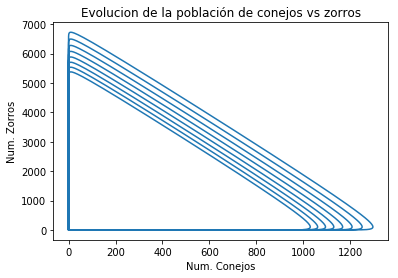

In [82]:
# Generemos una gráfica de dichos valores x = conejos, y = zorros
plt.plot(HISTORIA_CONEJOS, HISTORIA_ZORROS)
plt.title('Evolucion de la población de conejos vs zorros')
plt.xlabel('Num. Conejos')
plt.ylabel('Num. Zorros')

Text(0,0.5,'Num. Conejos')

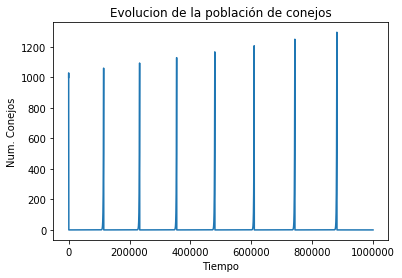

In [83]:
# Generemos una gráfica de la evolución de los conejos
plt.plot(HISTORIA_CONEJOS)
plt.title('Evolucion de la población de conejos')
plt.xlabel('Tiempo')
plt.ylabel('Num. Conejos')